In [2]:
import numpy as np

In [26]:
uber_data = np.genfromtxt("./data/Uber-Jan-Feb-FOIL.csv", 
                          delimiter=",", 
                          dtype=["U20", "U20", "U20", "U20"], 
                          names=True, 
                          unpack=True)

## The average number of active vehicles total

In [30]:
dates = uber_data["date"]

In [31]:
active_vehicles = uber_data["active_vehicles"].astype(int)

In [34]:
np.mean(avg_active_vehicles)

1307.4350282485875

## Active vehicles per day

In [113]:
day_vehicles = []

for idx, date in enumerate(dates):
    if idx == 0:
        continue
    if(date != dates[idx-1]):
        total = np.sum(uber_data[np.where(uber_data["date"] == dates[idx-1])]["active_vehicles"].astype(int))
        day_vehicles.append((date,total))

x, y = zip(*day_vehicles)


In [114]:
import matplotlib.pyplot as plt

In [169]:
day_vehicles_np = np.asarray(day_vehicles)
#print(day_vehicles_np)

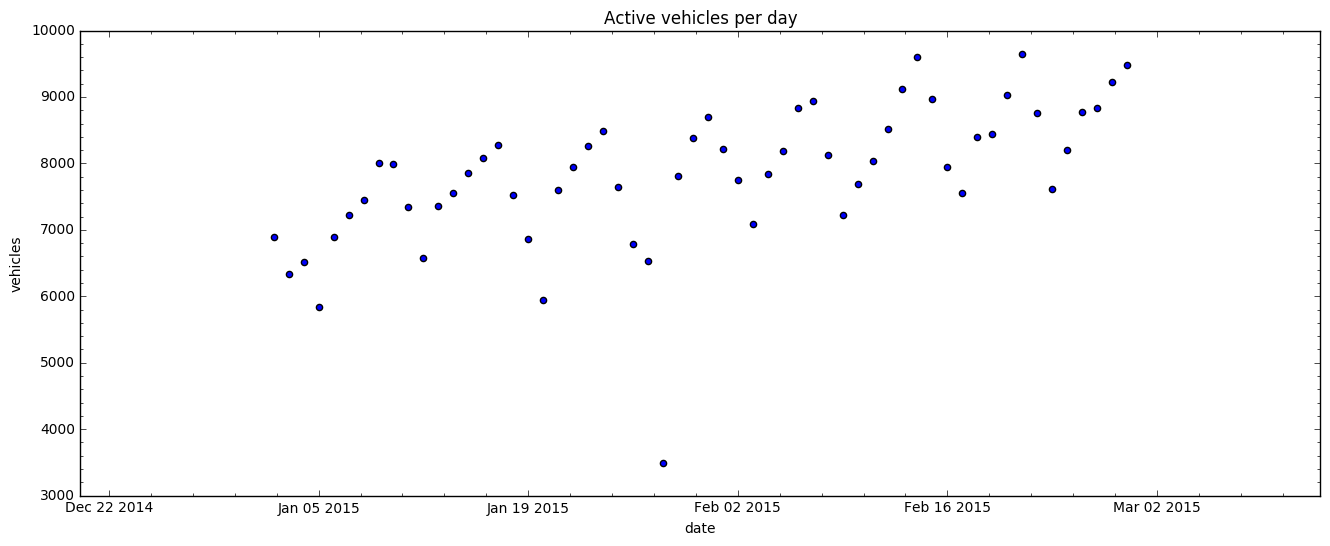

In [172]:

from datetime import datetime
plt.figure(figsize=(16,6))
plt.minorticks_on()
plt.title("Active vehicles per day")
plt.xlabel("date")
plt.ylabel("vehicles")
date_x = [datetime.strptime(date, '%m/%d/%Y') for date in list(x)]
vehicles_y = [int(vehicle) for vehicle in list(y)]
plt.scatter(date_x,vehicles_y)
plt.show()

In [171]:
vehicles_y_np = np.asarray(vehicles_y)
vehicles_y_np[vehicles_y_np < 5000] #day that vehicles dropped below 5k

array([3496])

## The average number of trips per day

In [64]:
averages = []
for idx, date in enumerate(dates):
    if idx == 0:
        continue
    if(date != dates[idx-1]):
        avg = np.average(uber_data[np.where(uber_data["date"] == dates[idx-1])]["trips"].astype(int))
        #print(date,avg)
        averages.append(avg)
        
print("average trips per day: ", int(np.average(averages)))

average trips per day:  11615


## Total trips each day

In [180]:
day_trips = []
for idx, date in enumerate(dates):
    if idx == 0:
        continue
    if(date != dates[idx-1]):
        sum_trips = np.sum(uber_data[np.where(uber_data["date"] == dates[idx-1])]["trips"].astype(int))
        #print(date,avg)
        day_trips.append((date,sum_trips))

x, y = zip(*day_trips)

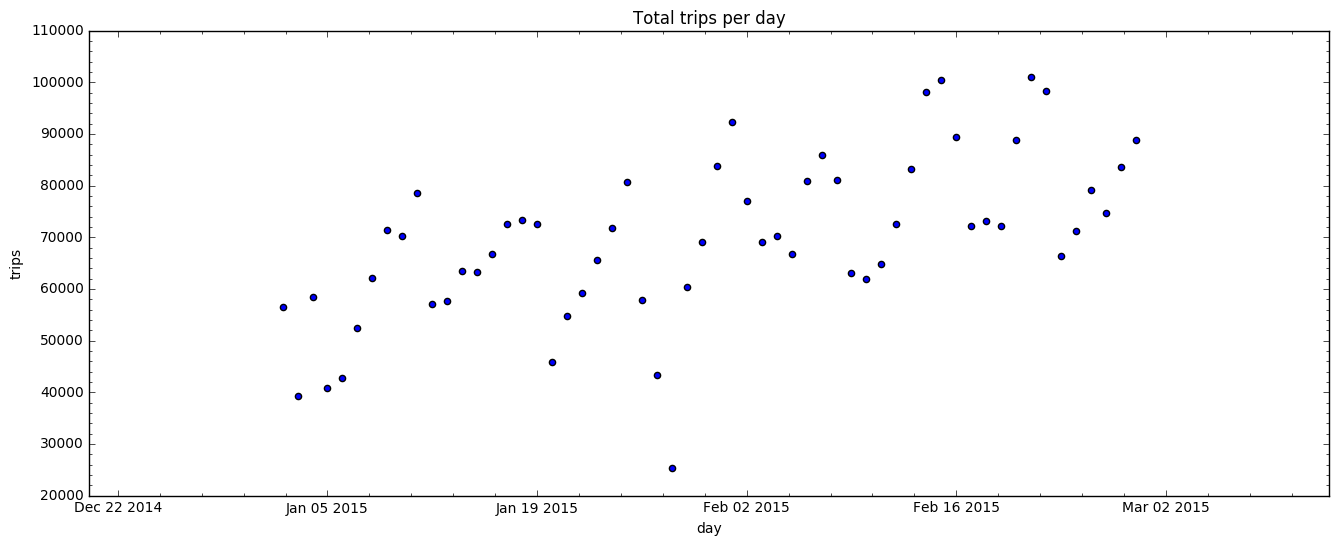

In [181]:
plt.figure(figsize=(16,6))
plt.minorticks_on()
plt.title("Total trips per day")
plt.xlabel("day")
plt.ylabel("trips")
date_x = [datetime.strptime(date, '%m/%d/%Y') for date in list(x)]
trips_y = [int(vehicle) for vehicle in list(y)]
plt.scatter(date_x,trips_y)
plt.show()

## The average number of active vehicles per dispatching base per day

In [70]:
bases = uber_data["dispatching_base_number"]
for idx, base in enumerate(bases):
    #grab all dates for this base
    info = uber_data[np.where(uber_data["date"] == uber_data[idx]["date"])]
    print("base: ", base, "info: ", info)

base:  B02512 info:  [('B02512', '1/1/2015', '190', '1132')
 ('B02765', '1/1/2015', '225', '1765')
 ('B02764', '1/1/2015', '3427', '29421')
 ('B02682', '1/1/2015', '945', '7679')
 ('B02617', '1/1/2015', '1228', '9537')
 ('B02598', '1/1/2015', '870', '6903')]
base:  B02765 info:  [('B02512', '1/1/2015', '190', '1132')
 ('B02765', '1/1/2015', '225', '1765')
 ('B02764', '1/1/2015', '3427', '29421')
 ('B02682', '1/1/2015', '945', '7679')
 ('B02617', '1/1/2015', '1228', '9537')
 ('B02598', '1/1/2015', '870', '6903')]
base:  B02764 info:  [('B02512', '1/1/2015', '190', '1132')
 ('B02765', '1/1/2015', '225', '1765')
 ('B02764', '1/1/2015', '3427', '29421')
 ('B02682', '1/1/2015', '945', '7679')
 ('B02617', '1/1/2015', '1228', '9537')
 ('B02598', '1/1/2015', '870', '6903')]
base:  B02682 info:  [('B02512', '1/1/2015', '190', '1132')
 ('B02765', '1/1/2015', '225', '1765')
 ('B02764', '1/1/2015', '3427', '29421')
 ('B02682', '1/1/2015', '945', '7679')
 ('B02617', '1/1/2015', '1228', '9537')
 ('B